In [ ]:
!pip install yfinance

In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

import yfinance as yf

# Set the time range for data extraction
start = datetime(2010, 1, 1)
end = datetime(2020, 12, 31)

# Load data
aapl = yf.download('AAPL', start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [3]:
aapl.shape

(2768, 6)

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(aapl['Close'].values.reshape(-1,1))

# Create a function to create sequences
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 60 days)
seq_length = 60
X, y = create_dataset(scaled_data, seq_length)

# Reshape features for LSTM Layer [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(X, y, batch_size=32, epochs=20)


Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0119
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 2.9487e-04
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 2.6360e-04
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 2.9127e-04
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 2.3309e-04
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 2.4905e-04
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 2.1013e-04
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 2.9431e-04
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.8845e-04
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 2.5543e-04
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.9072e-04
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 1.5720e-04
Epoch 13/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.5616e-04
Epoch 14/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 1.4563e-04
Epoch 15/20
8

In [ ]:
# Prediction
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [1]:


# Plotting
import matplotlib.pyplot as plt

# Plot the data
train = aapl[:len(predicted_prices)]
valid = aapl[len(predicted_prices):]
valid['Predictions'] = predicted_prices

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


NameError: name 'aapl' is not defined

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt



In [6]:
# Step 1: Load the data
start = datetime(2010, 1, 1)
end = datetime(2020, 12, 31)
# Load data
aapl = yf.download('AAPL', start=start, end=end)



[*********************100%***********************]  1 of 1 completed


In [7]:
# Step 2: Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aapl['Close'].values.reshape(-1, 1))

def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_dataset(scaled_data, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Splitting data into train, validation, and test sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)
test_size = len(X) - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.0041 - val_loss: 4.2455e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 4.8643e-05 - val_loss: 2.3033e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 4.2905e-05 - val_loss: 2.9447e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.1046e-05 - val_loss: 2.1709e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 4.2761e-05 - val_loss: 2.3901e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 4.3913e-05 - val_loss: 2.0940e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 3.9265e-05 - val_loss: 1.7591e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 3.7018e-05 - val_loss: 1.6545e-04
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.5200e-05 - val_loss: 1.6484e-04
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.1120e-05 - val_loss: 1.5522e-04
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 3.4402e-05 -

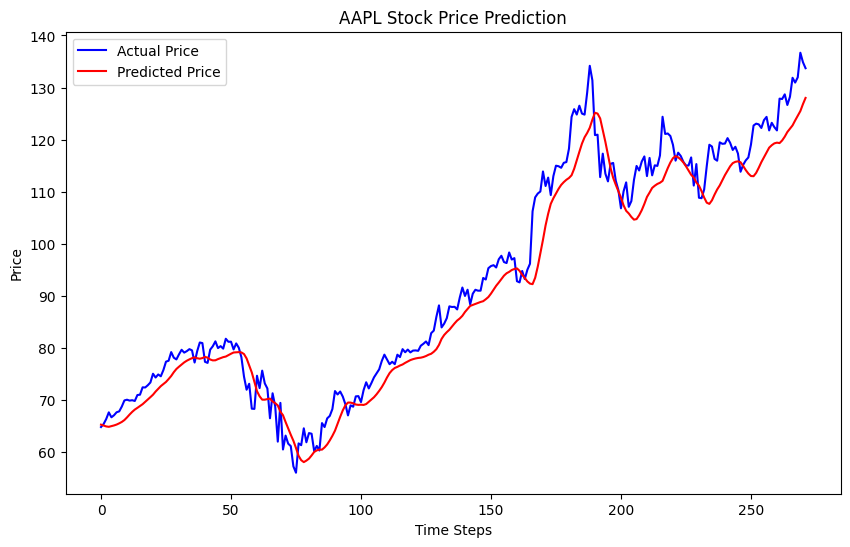

In [8]:
# Step 3: Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20)

# Step 5: Predicting and Plotting the Results
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()
